In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np



In [27]:
df = pd.read_csv('data/web-redditEmbeddings-subreddits.csv')
subred_filtered = pd.read_csv('data/filtered_network.csv')

In [28]:
source = (subred_filtered['SOURCE_SUBREDDIT'].unique())
target = (subred_filtered['TARGET_SUBREDDIT'].unique())

In [29]:
column_labels = ["subreddit"] + [f"vector_{i+1}" for i in range(300)]
df.columns = column_labels

In [30]:
subreddit_set = set(source) | set(target)
df = df[df["subreddit"].isin(subreddit_set)]

In [31]:
len(df)

263

In [32]:

vector_columns = [f"vector_{i+1}" for i in range(300)]
X = df[vector_columns]


In [33]:
# Normalize embeddings
scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(X)


/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

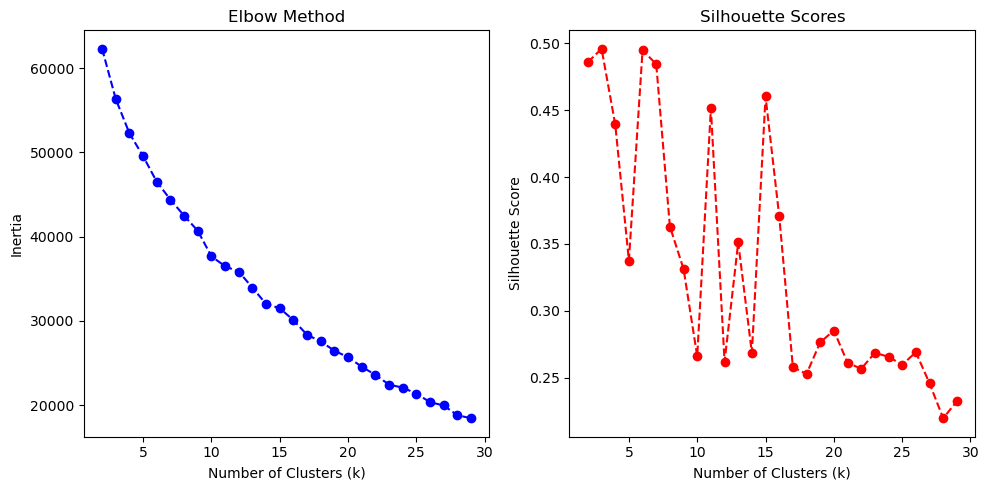

In [17]:

inertia = []
silhouette_scores = []
k_range = range(2, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_embeddings, cluster_labels))

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linestyle='--')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [44]:
# PCA to retain 95% variance
pca = PCA(n_components=0.95)
pca_embeddings = pca.fit_transform(normalized_embeddings)

print(f"Reduced dimensions: {pca_embeddings.shape[1]} (explained variance: {sum(pca.explained_variance_ratio_):.2f})")


Reduced dimensions: 27 (explained variance: 0.95)


In [45]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_embeddings)



/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

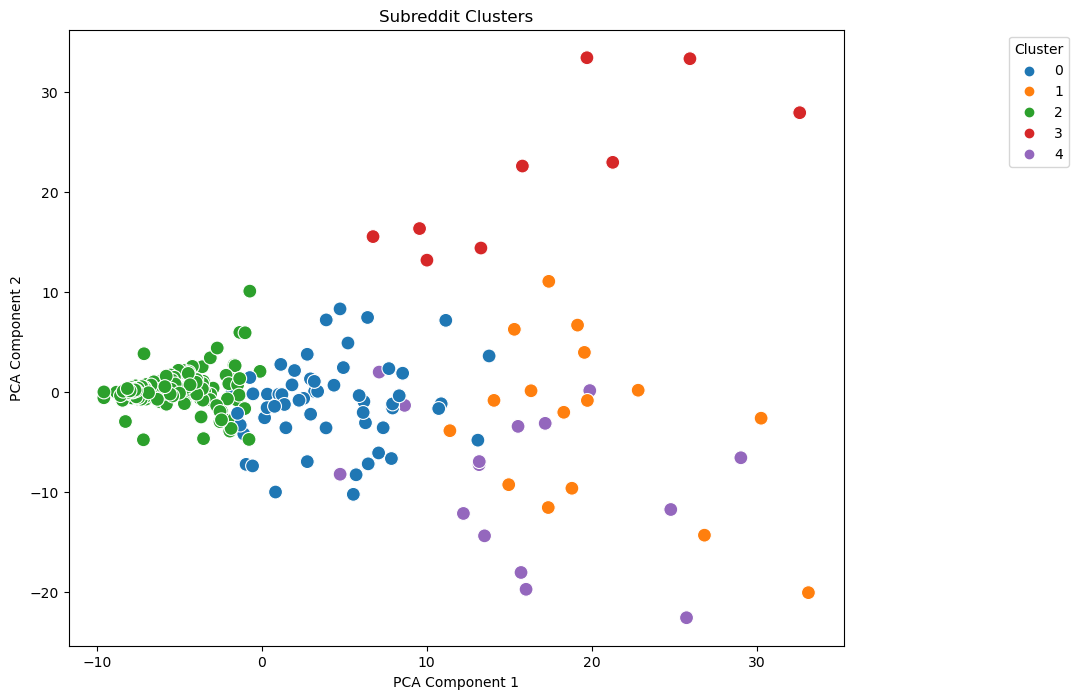

In [46]:
pca_2d = PCA(n_components=2).fit_transform(normalized_embeddings)

df['PCA1'] = pca_2d[:, 0]
df['PCA2'] = pca_2d[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df, s=100
)
plt.title("Subreddit Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjusting legend position
plt.show()


In [47]:
silhouette = silhouette_score(normalized_embeddings, df['Cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

for cluster_id in range(optimal_k):
    subreddits = df[df['Cluster'] == cluster_id]['subreddit']
    print(f"Cluster {cluster_id}: {list(subreddits)}")


Silhouette Score: 0.34
Cluster 0: ['geopolitics', 'unfilter', 'enoughlibertarianspam', 'jillstein', 'abetterworldnews', 'progun', 'australianpolitics', 'communism', 'reformed', 'shitliberalssay', 'conservatives_r_us', 'marchagainsttrump', 'labor', 'conservativesonly', 'impeach_trump', 'britishpolitics', 'shitpoliticssays', 'gunpolitics', 'againstmensrights', 'postnationalist', 'worldevents', 'shitrconservativesays', 'randpaul', 'communism101', 'libertarianmeme', 'esist', 'nevertrump', 'obama', 'alltheleft', 'thedavidpakmanshow', 'prolife', 'terrorism', 'neutralnews', 'trueprogressive', 'europeans', 'guncontrol', 'antiwar', 'iranpolitics', 'restorethefourth', 'europes', 'media_criticism', 'thenewcoldwar', 'stillsandersforpres', '2016_elections', 'austrian_economics', 'socialistmusic', 'censorship', 'chomsky', 'moderatepolitics', 'libertarianpartyusa', 'sandersmedia', 'rojava', 'ronpaul', 'badukpolitics', 'justicedemocrats', 'foreignpolicyanalysis', 'demsocialist']
Cluster 1: ['politic',

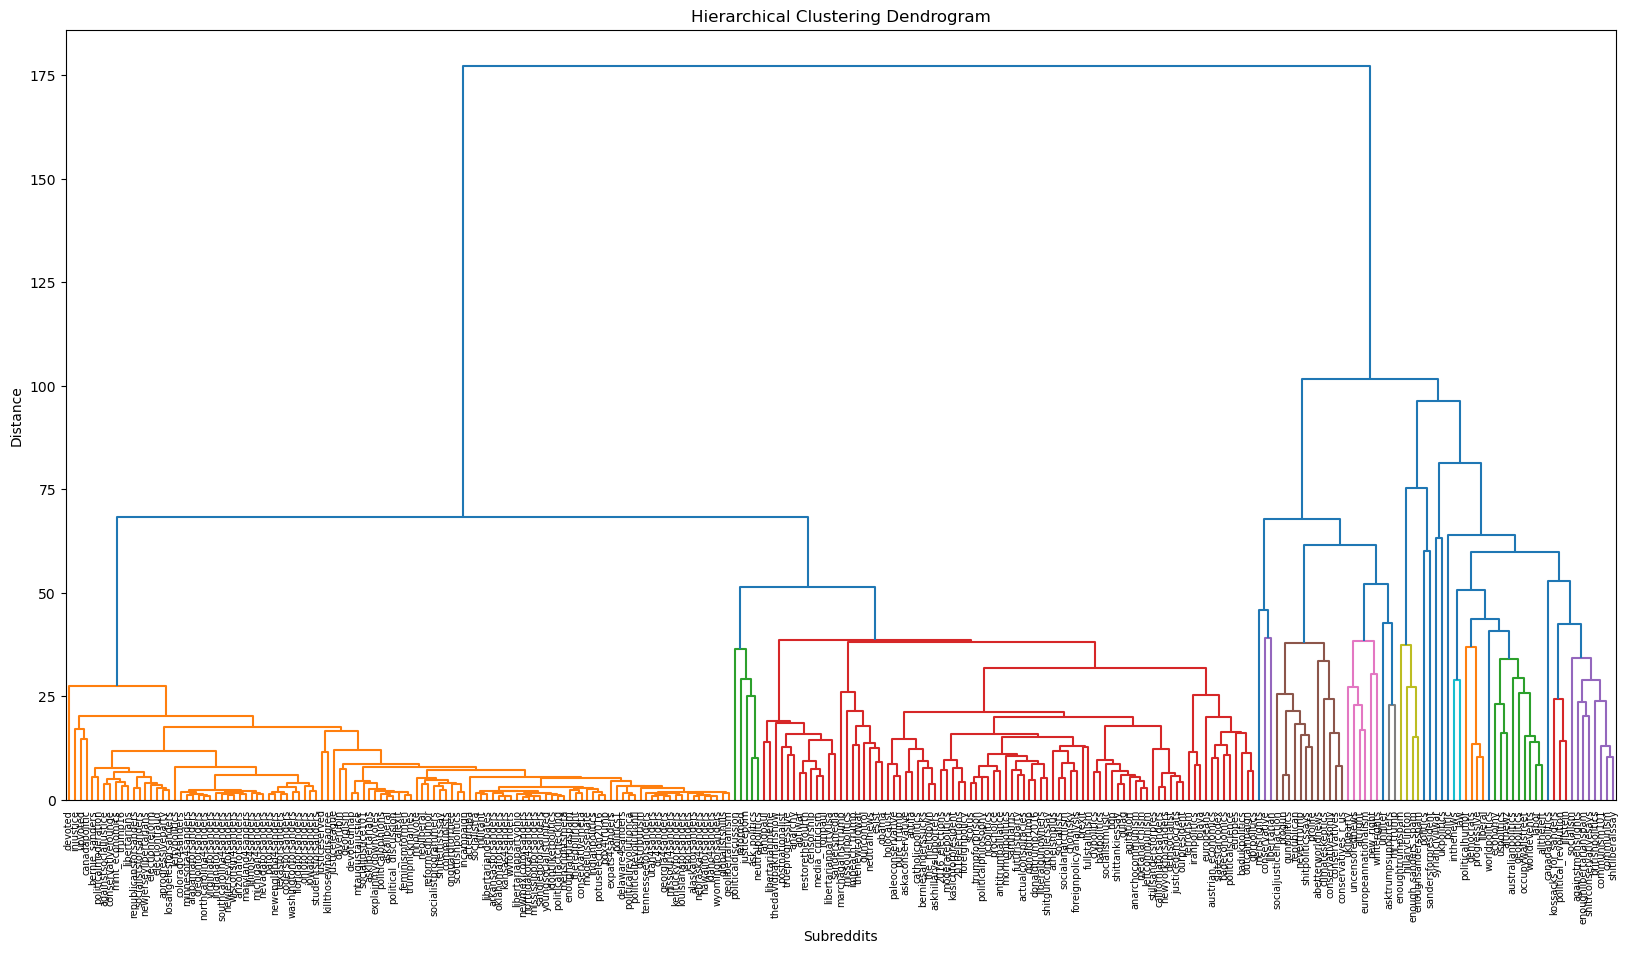

In [48]:
# Compute linkage matrix
linkage_matrix = linkage(normalized_embeddings, method='ward')

plt.figure(figsize=(20, 10)) 
dendrogram(
    linkage_matrix,
    labels=df['subreddit'].values,
    leaf_rotation=90,
    leaf_font_size=7,
    color_threshold=40,  
    truncate_mode=None   
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Subreddits")
plt.ylabel("Distance")
plt.show()

num_clusters = 5
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')


In [49]:
# Compare KMeans and hierarchical clustering
adjusted_rand = adjusted_rand_score(df['Cluster'], df['Hierarchical_Cluster'])
print(f"Adjusted Rand Index (KMeans vs. Hierarchical): {adjusted_rand:.2f}")


Adjusted Rand Index (KMeans vs. Hierarchical): 0.58


In [41]:
df.drop(columns=vector_columns).to_csv('data/embedding_clusters.csv', index=False)

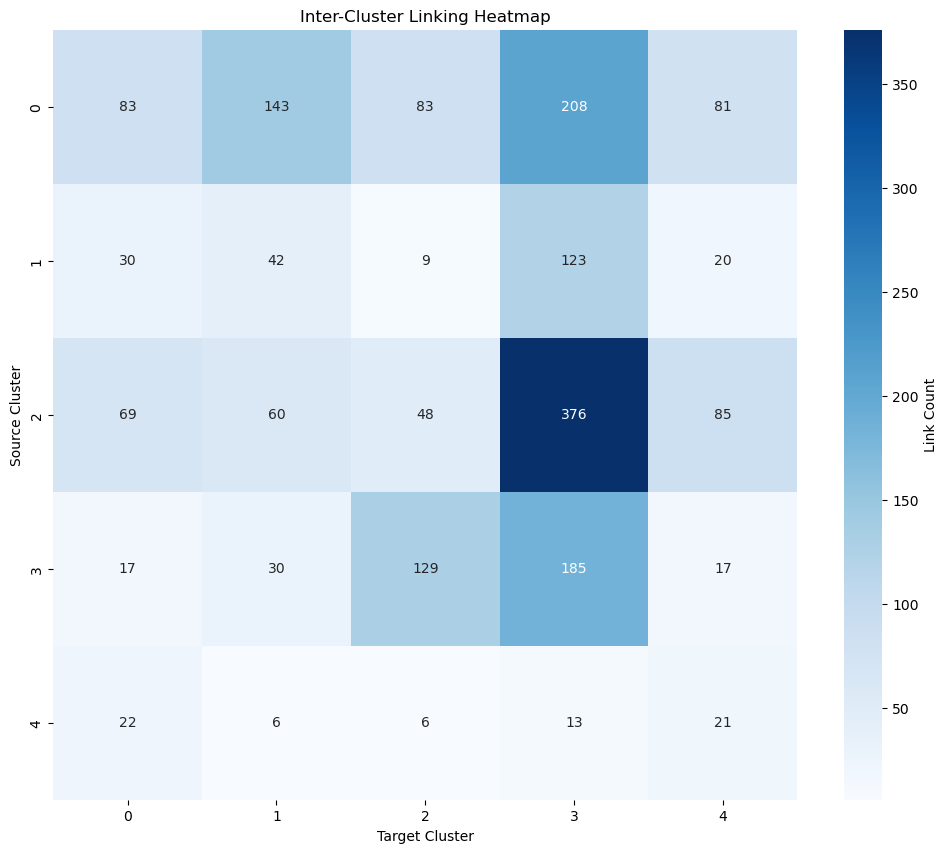

In [50]:

# Merge clusters with link data
source_clusters = df[['subreddit', 'Cluster']].rename(columns={'Cluster': 'Source_Cluster'})
target_clusters = df[['subreddit', 'Cluster']].rename(columns={'Cluster': 'Target_Cluster'})
link_data = subred_filtered.merge(source_clusters, left_on='SOURCE_SUBREDDIT', right_on='subreddit', how='inner').merge(
    target_clusters, left_on='TARGET_SUBREDDIT', right_on='subreddit', how='inner'
)

# Aggregate link counts by cluster pairs
cluster_links = link_data.groupby(['Source_Cluster', 'Target_Cluster']).size().reset_index(name='Count')
link_matrix = cluster_links.pivot(index="Source_Cluster", columns="Target_Cluster", values="Count").fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(link_matrix, cmap='Blues', annot=True, fmt=".0f", cbar_kws={'label': 'Link Count'})
plt.title("Inter-Cluster Linking Heatmap")
plt.xlabel("Target Cluster")
plt.ylabel("Source Cluster")
plt.show()
